In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [42]:
# Binary classification

In [3]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42)

In [4]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [6]:
import pandas as pd

circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], 'label': y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [7]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

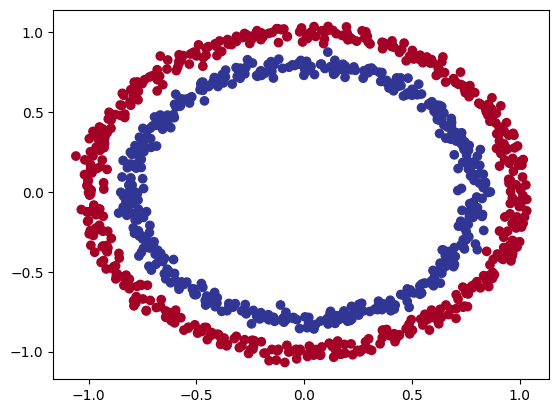

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:,1], c = y, cmap = plt.cm.RdYlBu);

In [11]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_1.compile(loss= 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy']
                )
history = model_1.fit(X,y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 0.6981 - accuracy: 0.4990
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.4970
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.4960
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.5030
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4980
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4930
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5130
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6929 - accuracy: 0.5150
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5170
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6923 - accuracy: 0.5180
Epoch 11/

In [12]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.5814 - accuracy: 0.8180


[0.5814080834388733, 0.8180000185966492]

In [38]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), #default lr is 0.001
                metrics = ['accuracy']
)

history = model_2.fit(X,y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5110
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5420
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5490
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.6380
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6419 - accuracy: 0.6910
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6008 - accuracy: 0.7320
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5386 - accuracy: 0.7800
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.8320
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4147 - accuracy: 0.8840
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3465 - accuracy: 0.9370
Epoch 11/

In [18]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1599 - accuracy: 0.9800


[0.15992657840251923, 0.9800000190734863]

In [19]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.694068,0.485
1,0.691618,0.518
2,0.690184,0.510
3,0.686957,0.521
4,0.683827,0.535
5,0.665681,0.598
6,0.645336,0.630
7,0.609782,0.682
8,0.570881,0.720
9,0.529739,0.784


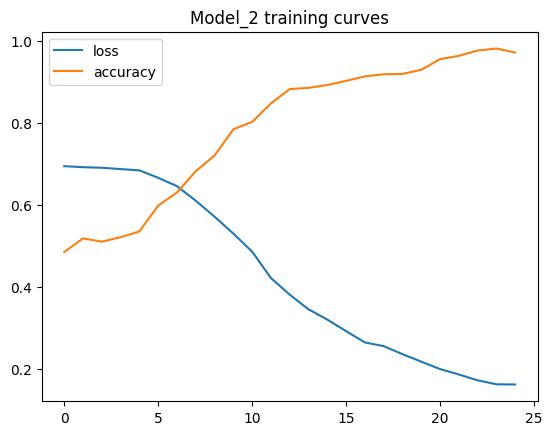

In [21]:
pd.DataFrame(history.history).plot()
plt.title('Model_2 training curves');

In [30]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_3.compile(loss = 'binary_crossentropy',
                optimizer = 'Adam',
                metrics = ['accuracy']
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_3.fit(X_train, y_train, epochs = 100, callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 2s 7ms/step - loss: 0.6910 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6909 - accuracy: 0.5025 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6908 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6908 - accuracy: 0.5013 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6907 - accuracy: 0.5013 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5000 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5000 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.4988 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

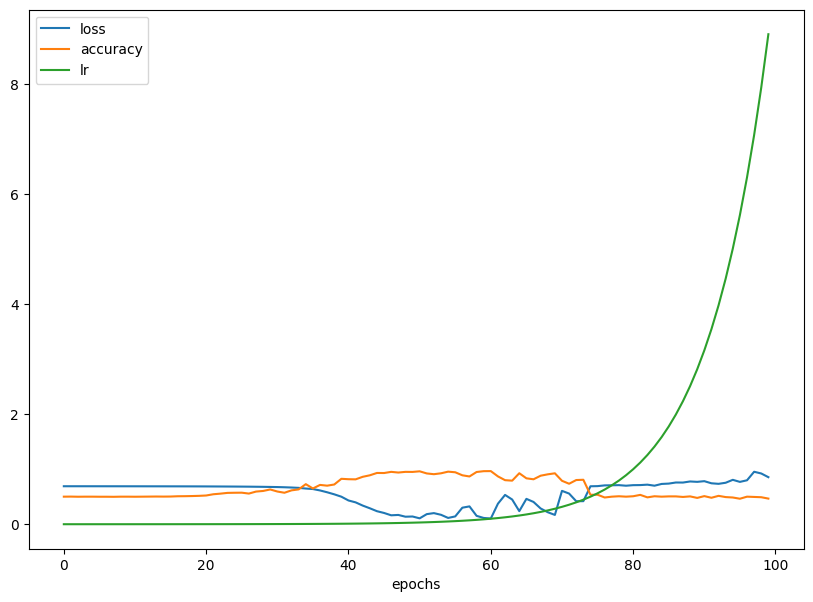

In [31]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel = 'epochs');

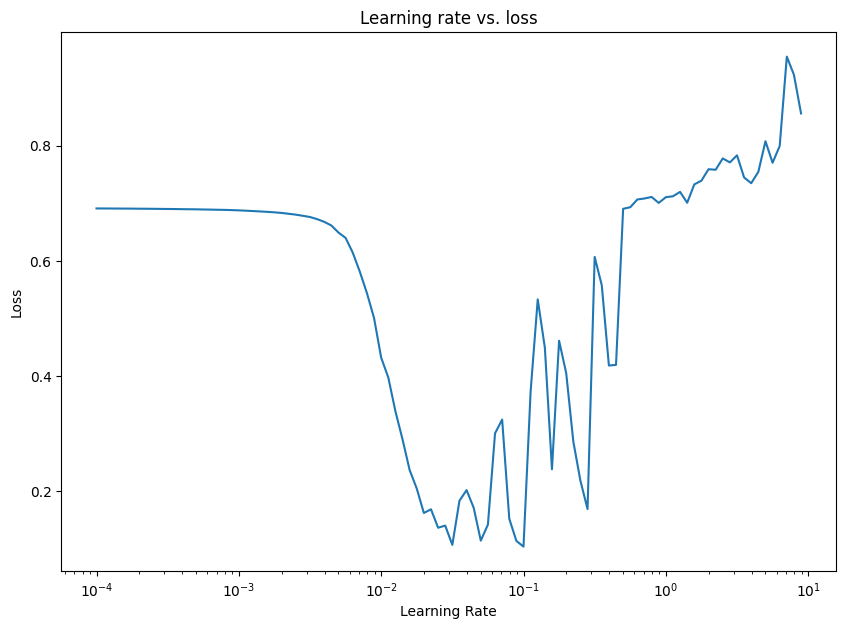

In [32]:
import numpy as np

lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [40]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    ]
)

model_4.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
                metrics = ['accuracy']
                )

history = model_4.fit(X_train, y_train, epochs = 100)

Epoch 1/100
25/25 [==============================] - 2s 4ms/step - loss: 0.6935 - accuracy: 0.5337
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6776 - accuracy: 0.5763
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6449 - accuracy: 0.6500
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5784 - accuracy: 0.8725
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4831 - accuracy: 0.8850
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3681 - accuracy: 0.9425
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2826 - accuracy: 0.9688
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2159 - accuracy: 0.9800
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1673 - accuracy: 0.9925
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1317 - accuracy: 0.9950
Epoch 11/

In [41]:
from sklearn.metrics import confusion_matrix

y_preds = model_4.predict(X_test)
confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 2ms/step


array([[100,   1],
       [  0,  99]])

In [43]:
# Multiclass classification

In [45]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

tf.__version__

'2.12.0'

In [46]:
(X_train, y_train), (X_valid, y_valid) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [50]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [56]:
y_train[0]

9

In [76]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [77]:
X_train[0].shape, y_train[0].shape

((28, 28), ())

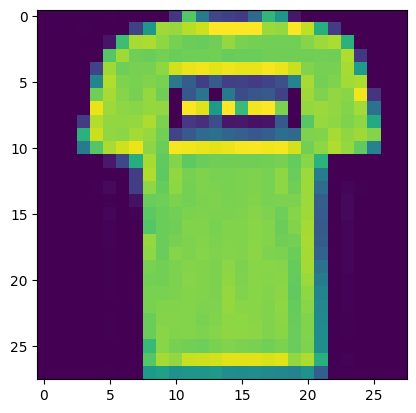

In [63]:
import matplotlib.pyplot as plt

plt.imshow(X_train[1]);

In [64]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

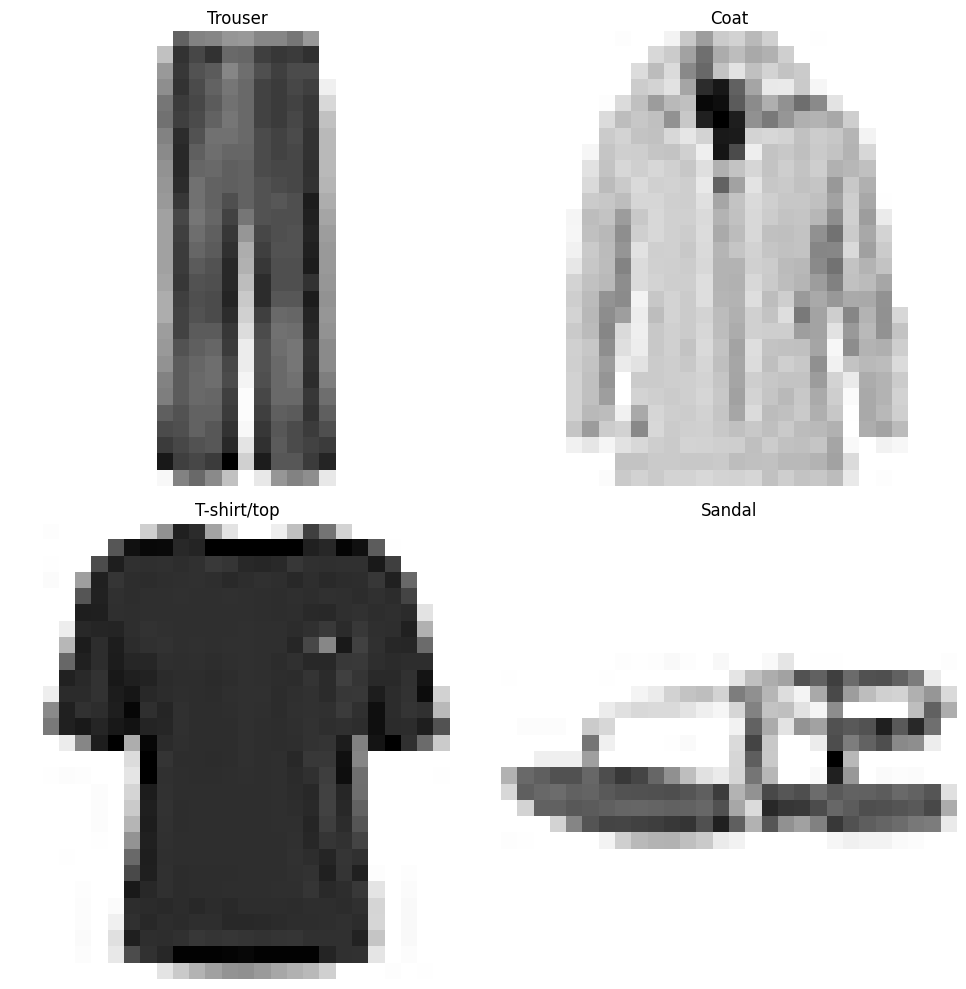

In [68]:
import random
plt.figure(figsize = (10,10))
for i in range(4):
  ax = plt.subplot(2,2, i+1)
  rand_idx = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_idx], cmap = plt.cm.binary)
  plt.title(class_names[y_train[rand_idx]])
  plt.axis(False)

plt.tight_layout()

In [70]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), #instead of CategoricalCrossentropy() cause that requires the features to be one-hot encoded
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy']
)

history = model_1.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.4513 - accuracy: 0.1123 - val_loss: 2.2464 - val_accuracy: 0.1259
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2324 - accuracy: 0.1323 - val_loss: 2.2331 - val_accuracy: 0.1500
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.0021 - accuracy: 0.1852 - val_loss: 1.7922 - val_accuracy: 0.2253
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7356 - accuracy: 0.2459 - val_loss: 1.6926 - val_accuracy: 0.2654
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6645 - accuracy: 0.2842 - val_loss: 1.6448 - val_accuracy: 0.2840
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6314 - accuracy: 0.2885 - val_loss: 1.6239 - val_accuracy: 0.2947
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6137 - accuracy: 0.2884 - val_loss: 1.6109 - val_accuracy:

In [78]:
norm_X_train = X_train/255.0
norm_X_valid = X_valid/255.0

In [87]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'sigmoid')
])

model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

norm_history = model_2.fit(norm_X_train, y_train, epochs = 20, validation_data = (norm_X_valid, y_valid))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4596 - accuracy: 0.4375 - val_loss: 1.1093 - val_accuracy: 0.5898
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9676 - accuracy: 0.6544 - val_loss: 0.8911 - val_accuracy: 0.6897
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8165 - accuracy: 0.7097 - val_loss: 0.7836 - val_accuracy: 0.6884
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7230 - accuracy: 0.7340 - val_loss: 0.7267 - val_accuracy: 0.7195
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6898 - accuracy: 0.7465 - val_loss: 0.7254 - val_accuracy: 0.7445
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6699 - accuracy: 0.7548 - val_loss: 0.7098 - val_accuracy: 0.7453
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6569 - accuracy: 0.7609 - val_loss: 0.7129 - val_accuracy:

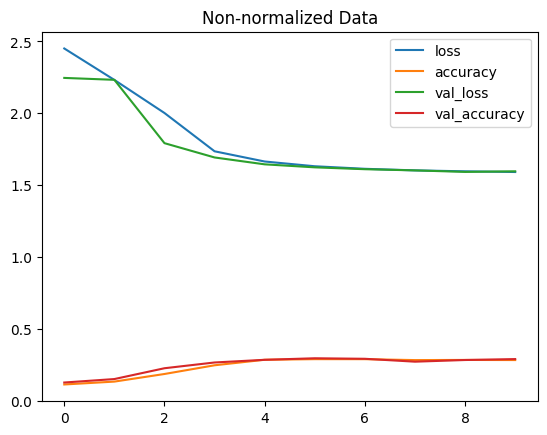

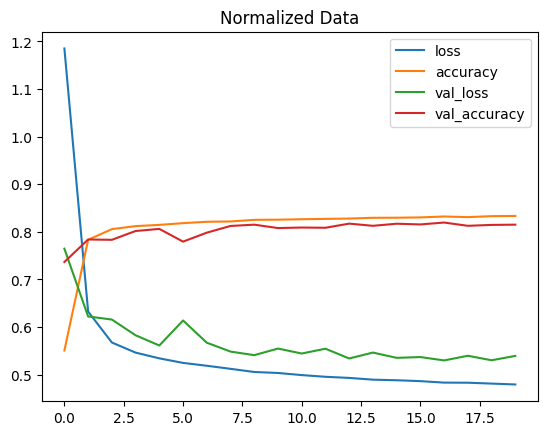

In [84]:
pd.DataFrame(history.history).plot(title = 'Non-normalized Data')
pd.DataFrame(norm_history.history).plot(title= 'Normalized Data');

In [89]:
y_probs = model_2.predict(norm_X_valid)

313/313 [==============================] - 1s 3ms/step


In [92]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(5, 'Sandal')

In [93]:
y_preds = y_probs.argmax(axis = 1)

y_preds[:10]

array([5, 2, 1, 1, 6, 1, 4, 4, 5, 7])